In [3]:
from qresearch.data.types import MarketData
from qresearch.data.utils import get_raw_dir, get_processed_dir
import numpy as np
import pandas as pd
import akshare as ak

from qresearch.signals import compute_signal

In [4]:
fund_name_em_df = ak.fund_name_em()
fund_name_em_df

,基金代码,拼音缩写,基金简称,基金类型,拼音全称
0,000001,HXCZHH,华夏成长混合,混合型-灵活,HUAXIACHENGZHANGHUNHE
1,000002,HXCZHH,华夏成长混合(后端),混合型-灵活,HUAXIACHENGZHANGHUNHE
2,000003,ZHKZZZQA,中海可转债债券A,债券型-混合二级,ZHONGHAIKEZHUANZHAIZHAIQUANA
3,000004,ZHKZZZQC,中海可转债债券C,债券型-混合二级,ZHONGHAIKEZHUANZHAIZHAIQUANC
4,000005,JSZQXYDQZQ,嘉实增强信用定期债券,债券型-混合一级,JIASHIZENGQIANGXINYONGDINGQIZHAIQUAN
...,...,...,...,...,...
26062,970201,YHSXJLZDZZQA,银河水星聚利中短债债券A,债券型-中短债,YINHESHUIXINGJULIZHONGDUANZHAIZHAIQUANA
26063,970202,YHSXJLZDZZQC,银河水星聚利中短债债券C,债券型-中短债,YINHESHUIXINGJULIZHONGDUANZHAIZHAIQUANC
26064,970203,YHSXJLZDZZQE,银河水星聚利中短债债券E,债券型-中短债,YINHESHUIXINGJULIZHONGDUANZHAIZHAIQUANE
26065,970204,XZZGJQLXXZLLGYCYQZQA,兴证资管金麒麟兴享增利六个月持有期债券A,债券型-混合二级,XINGZHENGZIGUANJINQILINXINGXIANGZENGLILIUGEYUE...


In [5]:
tick_name_map = {fund_name_em_df['基金代码'].iloc[i]: fund_name_em_df['基金简称'].iloc[i] for i in range(fund_name_em_df.shape[0])}

In [6]:
df = pd.read_csv(get_processed_dir() / 'data_cn_etf_universe' / 'jqdata_etf.csv')
df = df.set_index('date')
df.index = pd.to_datetime(df.index)
df['code'] = df['code'].apply(lambda x: x[:-5])
df['ticker'] = df['code'].map(tick_name_map)
df

,open,close,high,low,volume,money,code,ticker
date,,,,,,,,
2015-01-05,0.805,0.805,0.819,0.784,2.362194e+08,1.896586e+08,512070,易方达沪深300非银ETF
2015-01-06,0.799,0.791,0.808,0.770,1.720951e+08,1.356646e+08,512070,易方达沪深300非银ETF
2015-01-07,0.790,0.803,0.836,0.778,2.381290e+08,1.921301e+08,512070,易方达沪深300非银ETF
2015-01-08,0.804,0.777,0.812,0.769,1.285293e+08,1.007712e+08,512070,易方达沪深300非银ETF
2015-01-09,0.776,0.778,0.825,0.767,1.772582e+08,1.404986e+08,512070,易方达沪深300非银ETF
...,...,...,...,...,...,...,...,...
2026-01-22,1.170,1.181,1.191,1.166,4.826403e+08,5.685693e+08,512980,广发中证传媒ETF
2026-01-23,1.192,1.221,1.225,1.176,1.231767e+09,1.487450e+09,512980,广发中证传媒ETF
2026-01-26,1.222,1.186,1.224,1.163,1.035069e+09,1.230859e+09,512980,广发中证传媒ETF


In [7]:
df.columns

Index(['open', 'close', 'high', 'low', 'volume', 'money', 'code', 'ticker'], dtype='object')

In [8]:
# import yfinance as yf
# btc_df = yf.download('BTC-USD', start=df.index[0], end=df.index[-1])
# # 3. Clean up columns (yfinance uses 'Close', your df uses 'close')
# btc_df.columns = [col[0].lower() for col in btc_df.columns]
# btc_df.columns = btc_df.columns.str.lower()
# 
# # 4. Add the identifier columns to match your df
# btc_df['code'] = 'BTC-USD'
# btc_df['ticker'] = 'Bitcoin'
# 
# # 5. Ensure columns match exactly
# # (This keeps only the columns that exist in your main df to avoid errors)
# common_cols = [c for c in df.columns if c in btc_df.columns]
# btc_df = btc_df[common_cols]
# # Stack btc_df below your existing df
# df = pd.concat([df, btc_df], axis=0, ignore_index=False)
# df

In [9]:
close_df = df.pivot_table(index=df.index, columns='ticker', values='close').iloc[:-1]
open_df = df.pivot_table(index=df.index, columns='ticker', values='open').iloc[:-1]
high_df = df.pivot_table(index=df.index, columns='ticker', values='high').iloc[:-1]
low_df = df.pivot_table(index=df.index, columns='ticker', values='low').iloc[:-1]
money_df = df.pivot_table(index=df.index, columns='ticker', values='money').iloc[:-1]
volume_df = df.pivot_table(index=df.index, columns='ticker', values='volume').iloc[:-1]
ticks = close_df.columns

In [10]:
fund_name_em_df = fund_name_em_df[fund_name_em_df['基金简称'].isin(ticks)]
all_types = {k: fund_name_em_df[fund_name_em_df['基金类型'] == k]['基金简称'].values for k in fund_name_em_df['基金类型'].unique()}

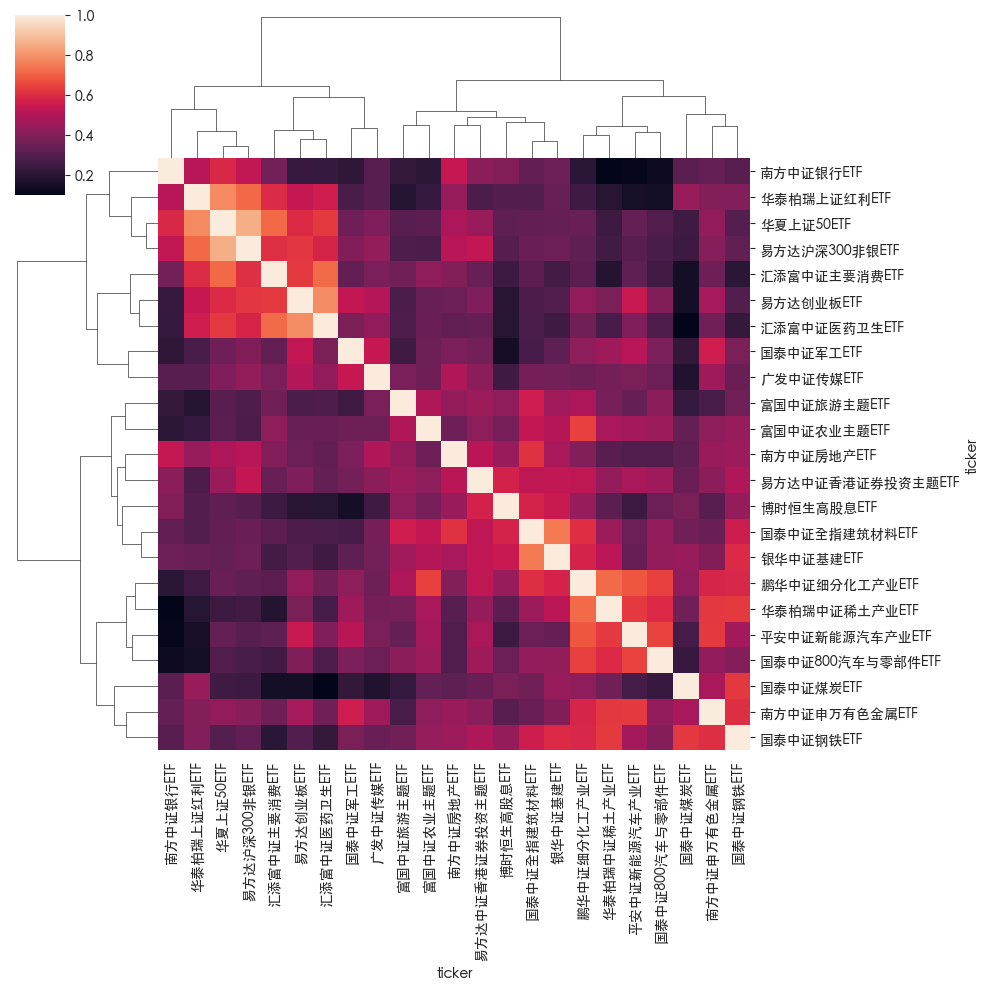

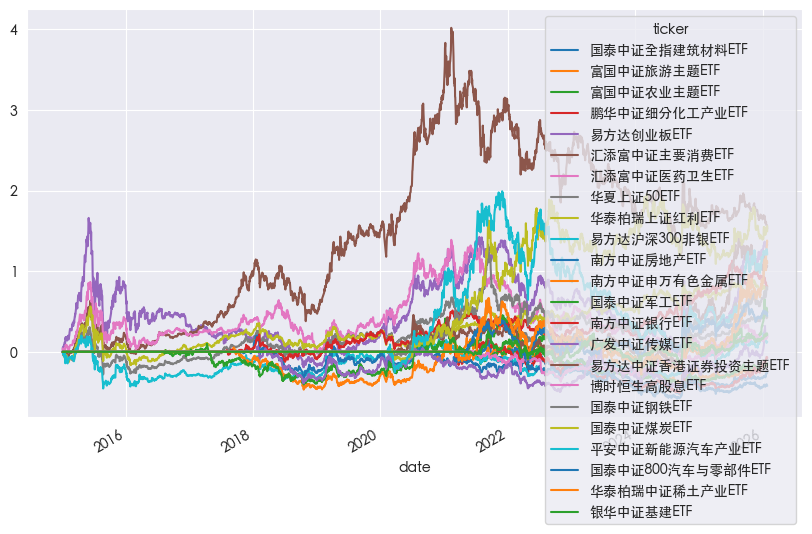

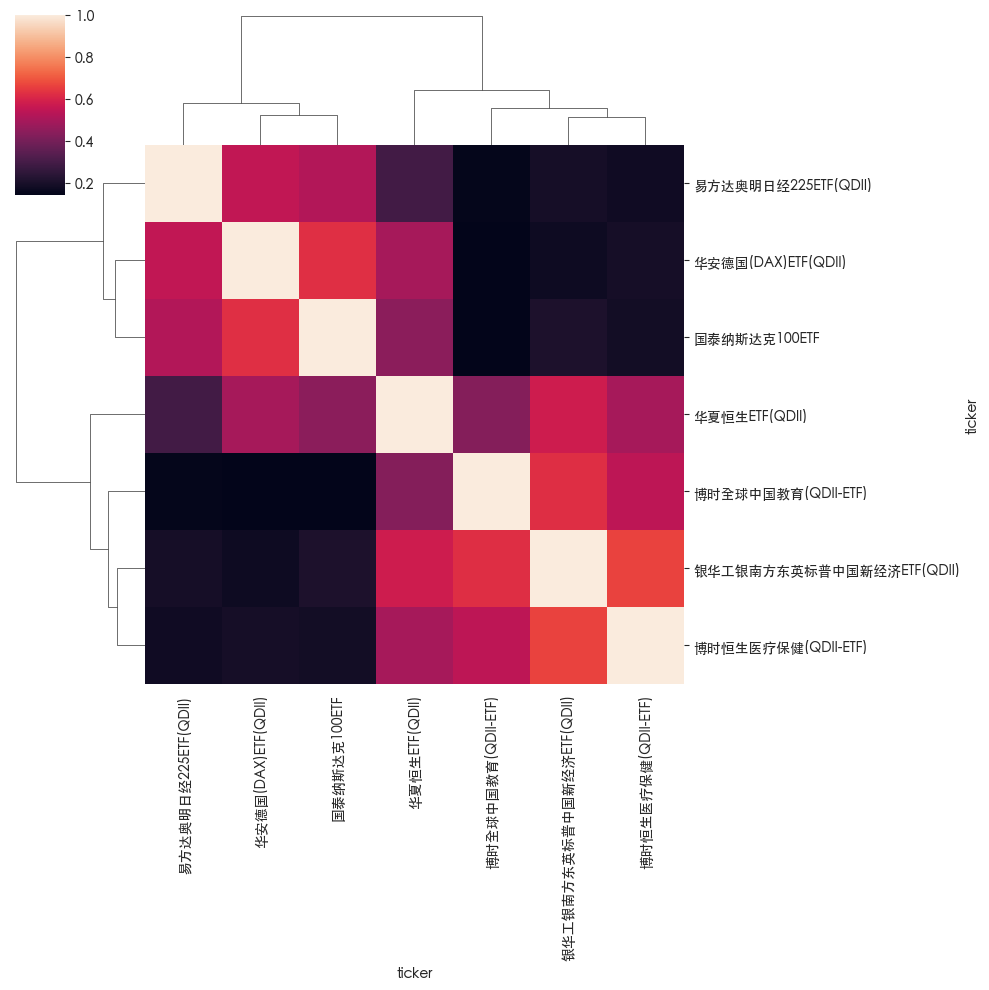

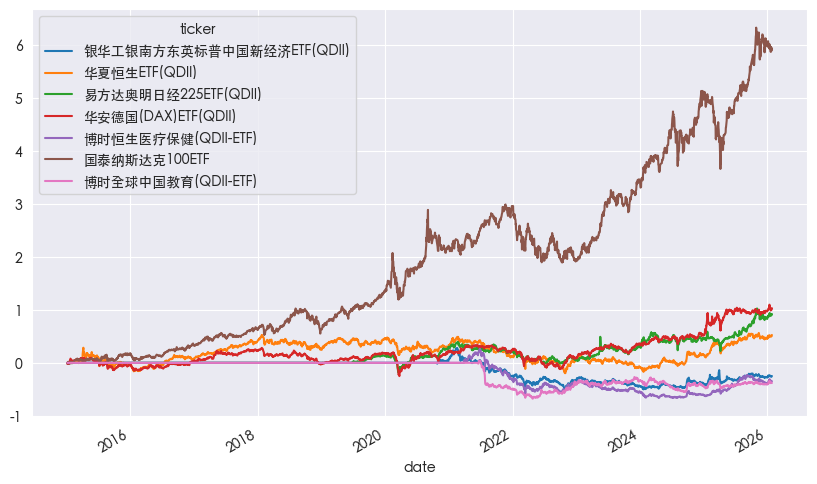

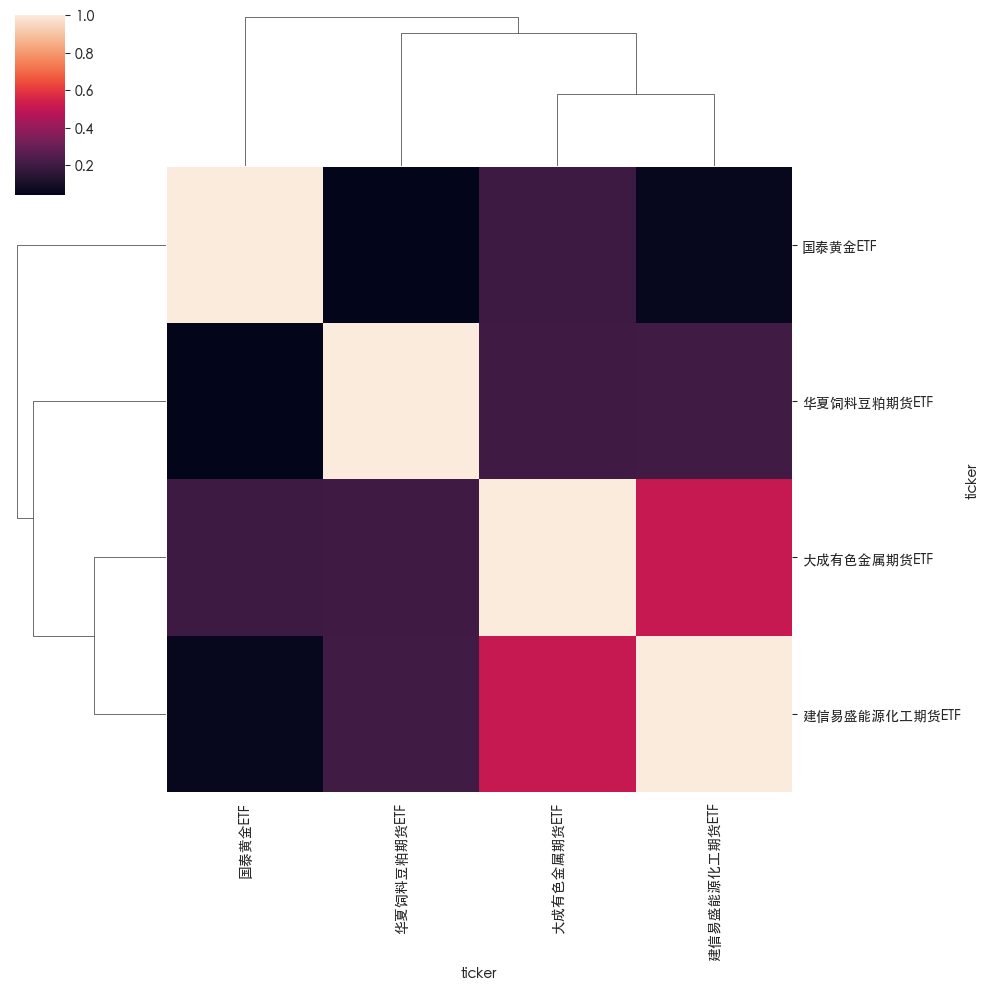

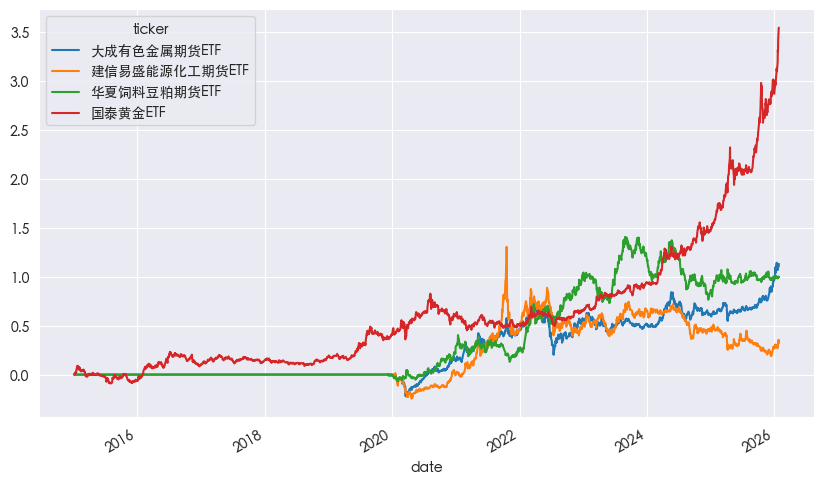

ValueError: The number of observations cannot be determined on an empty distance matrix.

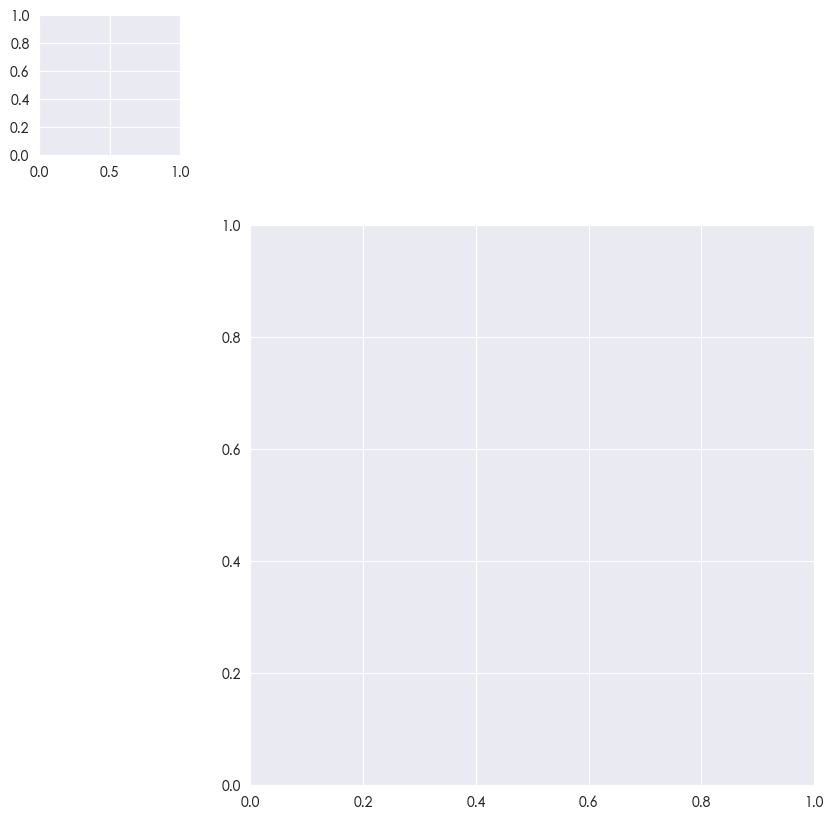

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Heiti TC']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

for etf_type, etfs in all_types.items():
    _df = close_df[etfs].rename(columns=tick_name_map)
    _rets = _df.pct_change().fillna(0)
    _eqs = (1 + _rets).cumprod() - 1
    etf_corr = _rets.corr()
    # plt.title(f'{etf_type}')
    # sns.heatmap(etf_corr)
    # plt.show()
    sns.clustermap(etf_corr, method='ward')
    plt.show()

    _eqs.plot(legend=True, figsize=(10, 6))
    plt.show()
    

In [12]:
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd

# 1. Create the Linkage Matrix (The 'Tree')
# 'ward' minimizes variance within clusters (keeps groups tight)
Z = linkage(close_df[all_types['指数型-股票']].pct_change().corr(), method='ward')

# 2. Cut the Tree to get Cluster Labels
# 't' is the threshold. Lower t = more, smaller groups. Higher t = fewer, bigger groups.
# A value of 1.5 - 2.0 is often a good starting point for correlation matrices.
labels = fcluster(Z, t=1.5, criterion='distance')

# 3. Organize the results
results = pd.DataFrame({'ticker': all_types['指数型-股票'], 'Cluster_ID': labels})
results.sort_values('Cluster_ID')

,ticker,Cluster_ID
0,国泰中证全指建筑材料ETF,1
15,易方达中证香港证券投资主题ETF,1
10,南方中证房地产ETF,1
9,易方达沪深300非银ETF,1
8,华泰柏瑞上证红利ETF,1
7,华夏上证50ETF,1
22,银华中证基建ETF,1
13,南方中证银行ETF,2
16,博时恒生高股息ETF,2
18,国泰中证煤炭ETF,2


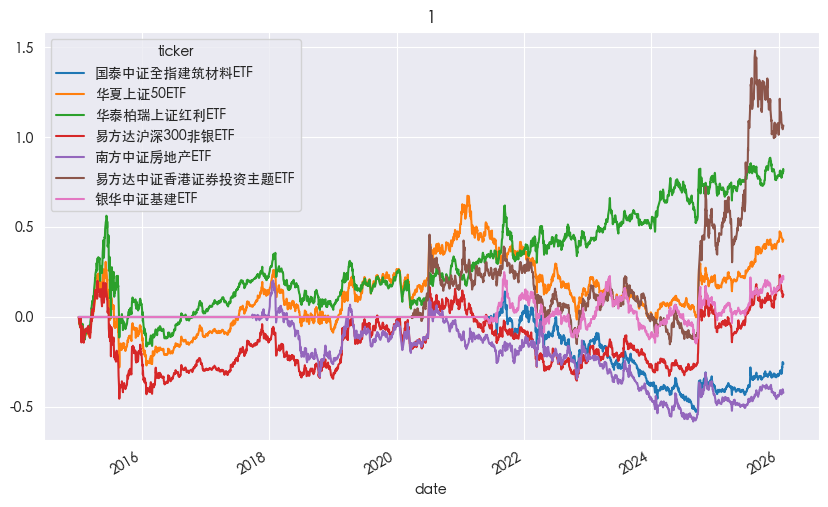

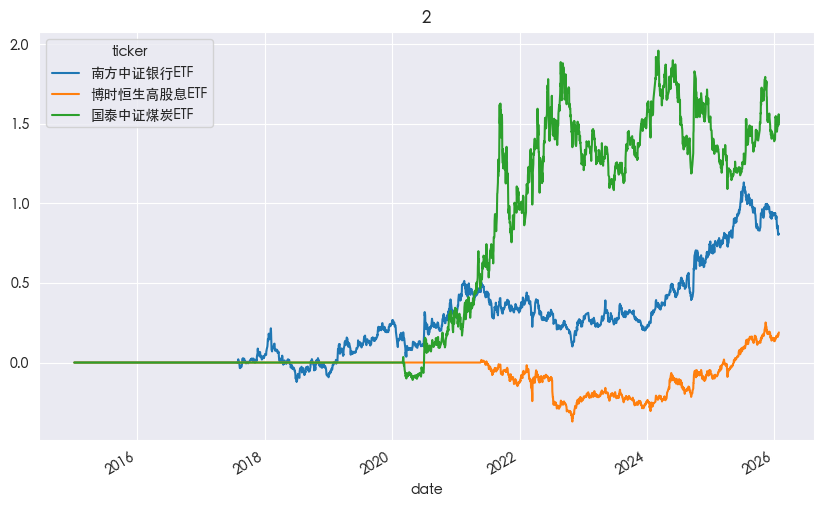

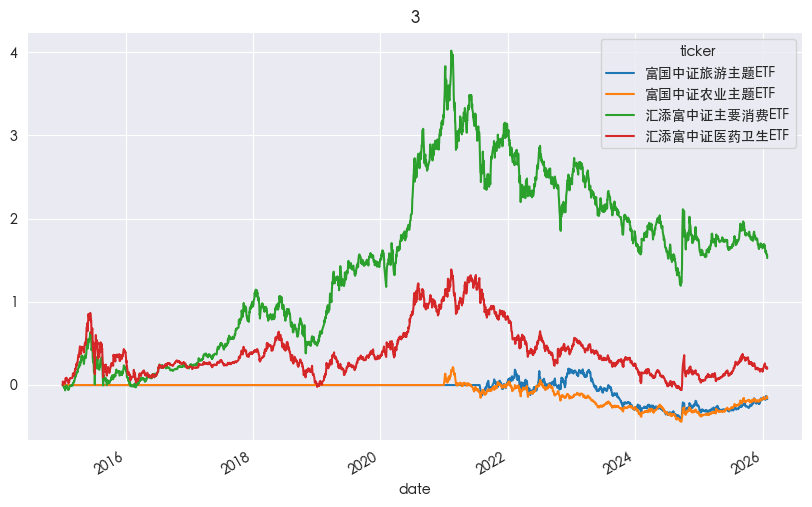

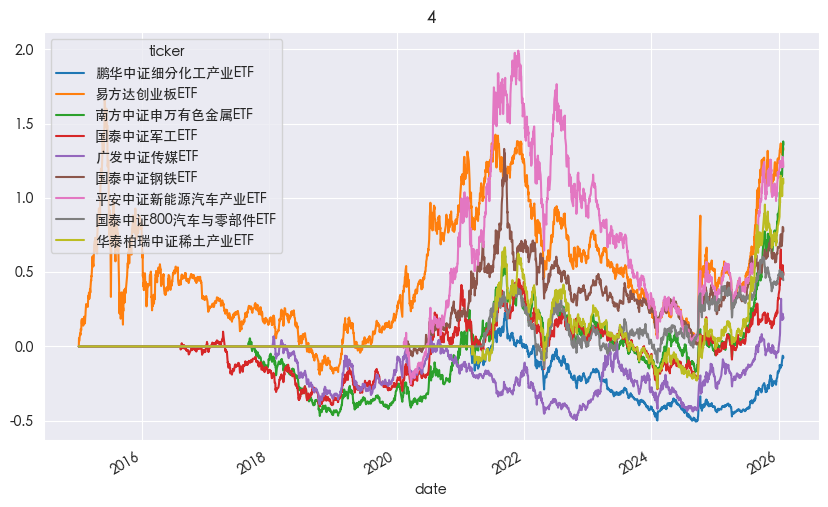

In [13]:
for id, result in results.groupby('Cluster_ID'):
    _df = close_df[result['ticker'].values]
    _rets = _df.pct_change().fillna(0)
    _eqs = (1 + _rets).cumprod() - 1
    
    _eqs.plot(legend=True, figsize=(10, 6))
    plt.title(id)
    plt.show()

In [20]:
# tickers = {
#     # '159915': '易方达创业板ETF',
#     '512070': '易方达沪深300非银ETF',
#     '510880': '华泰柏瑞上证红利ETF',
#     # '516780': '华泰柏瑞中证稀土产业ETF',
#     # '513690': '博时恒生高股息ETF',
#     # '512660': '国泰中证军工ETF',
#     # '512980': '广发中证传媒ETF',
#     # '515220': '国泰中证煤炭ETF',
#     # '159920': '华夏恒生ETF(QDII)',
#     
#     # '518800': '国泰黄金ETF',
#     # 
#     # '513100': '国泰纳斯达克100ETF',
# }

a_h_tickers = [
    '华夏上证50ETF',
    # '华泰柏瑞上证红利ETF',
    '国泰中证煤炭ETF',
    '易方达创业板ETF',
    # '平安中证新能源汽车产业ETF'
]

universe_tickers = ['国泰黄金ETF', '国泰纳斯达克100ETF'] + a_h_tickers

etf_md = MarketData(
    close=close_df[universe_tickers],
    open=open_df[universe_tickers],
    high=high_df[universe_tickers],
    low=low_df[universe_tickers],
    volume=volume_df[universe_tickers],
)

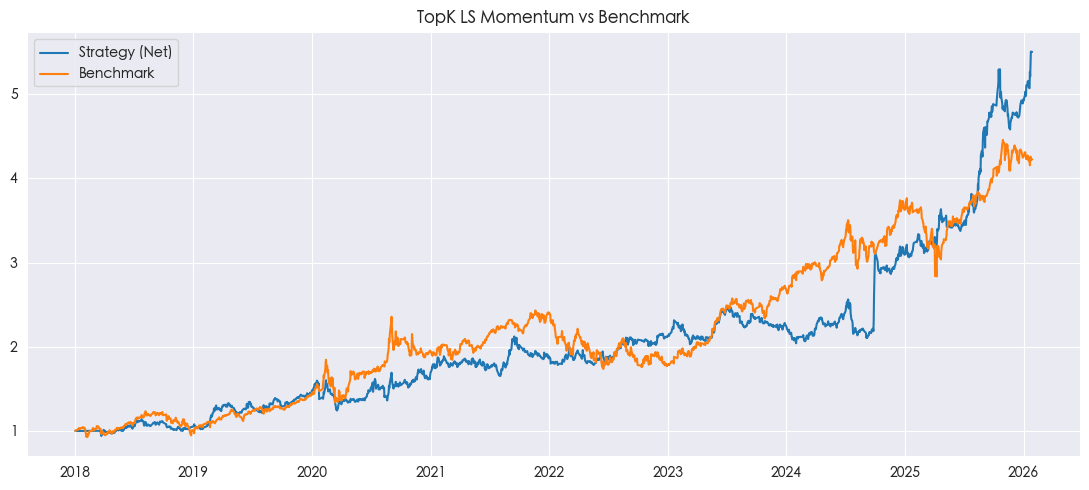

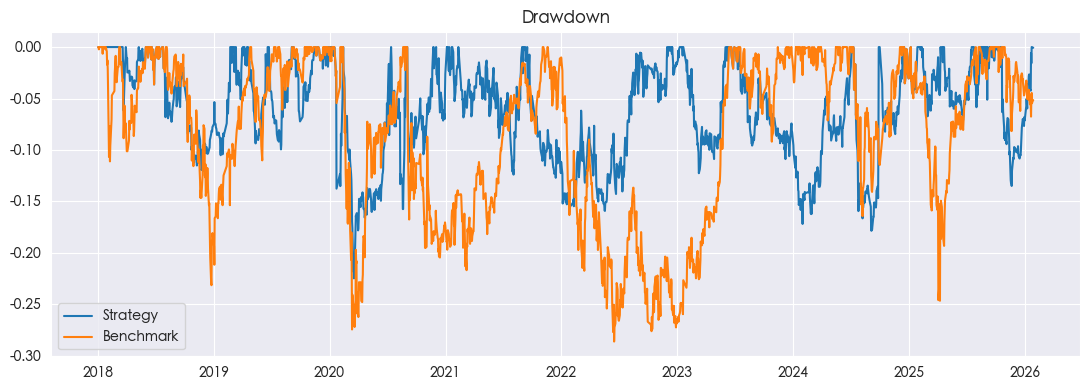

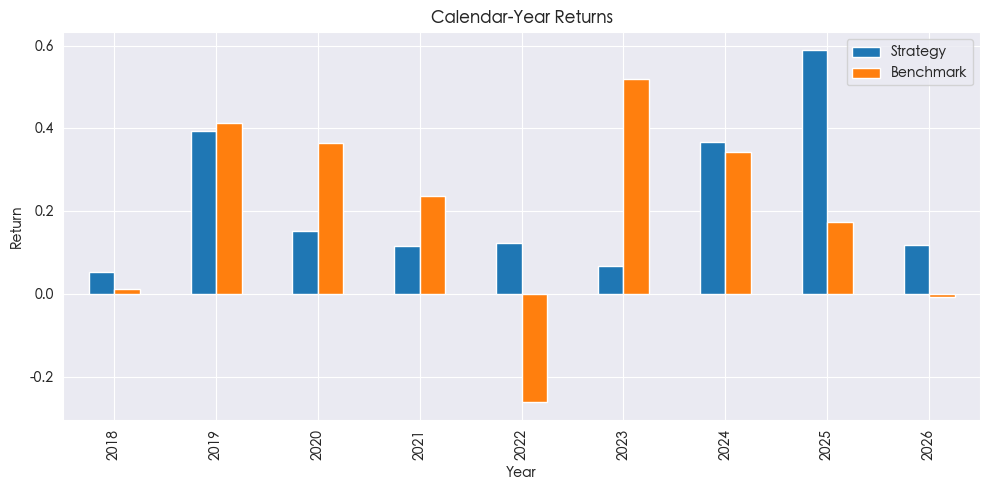

In [22]:
from qresearch.backtest.config import AllocationConfig, VolTargetConfig, StopLossConfig, TopKBookConfig
from qresearch.backtest.portfolio import ExperimentConfig, run_one, plot_compare

# -----------------------
# 0) Example: inputs you already have
# -----------------------
# close_df: pd.DataFrame  (index=date, columns=tickers, values=close prices)
# universe_eligible: optional pd.DataFrame (same shape, bool)

# -----------------------
# 1) Compute signal scores (example: simple momentum scores)
#    If you already computed `scores`, skip this section.
# -----------------------
lookback = 21
skip = 0

# decision-time score at date t uses returns up to t (no lookahead)
scores = compute_signal(etf_md, 'mom_ret', lookback=lookback, skip=skip)

# -----------------------
# 2) Optional filters (true momentum: long>0, short<0)
# -----------------------
# def long_pos(scores_row: pd.Series, dt) -> pd.Series:
#     return scores_row > 0
# 
# def short_neg(scores_row: pd.Series, dt) -> pd.Series:
#     return scores_row < 0

# -----------------------
# 3) Build experiment config
# -----------------------
cfg = ExperimentConfig(
    start="2018-01-01",
    entry_mode="next_open",
    benchmark_mode="single_ticker",
    benchmark_ticker="国泰纳斯达克100ETF",
    signal_name="mom_ret",
    signal_params={"lookback": 21},
    topk_cfg=TopKBookConfig(
        long_only=True, 
        long_k=1, 
        long_budget=1.0, 
        H=1, 
        reablance_mode="fixed_h"
    ),
    alloc_cfg=AllocationConfig(
        method="score_prop", 
        score_clip_floor=0.0, 
        w_cap=1.0
    ),
    vol_target_cfg=VolTargetConfig(
        enabled=True, 
        sigma_target=0.2, 
        vol_window=50, 
        exposure_cap=1.0
    ),
    # stop_cfg=StopLossConfig(
    #     enabled=True, 
    #     type="trailing_pct", 
    #     stop_pct=0.05
    # ),
)

# -----------------------
# 4) Run the pipeline
# -----------------------
out = run_one(
    md=etf_md,
    scores=scores,
    cfg=cfg,
    universe_eligible=None,  # or your boolean panel
)

# -----------------------
# 5) Inspect results
# -----------------------
# print(out["stats"])
# print(out["weights_strategy"].head())
# print(out["strat"].equity_net.tail())

# -----------------------
# 6) Plot vs benchmark (if you kept plot_compare)
# -----------------------
plot_compare(out["strat"], out["bench"], title="TopK LS Momentum vs Benchmark")
